In [6]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [2]:
# Load the dataset
df = pd.read_csv('google_stock_prices.csv')

In [7]:
# Preprocess the 'Close' prices
df['Close'] = df['Close'].apply(lambda x: re.sub(',', '', x))  # Remove commas
data = df['Close'].astype(float).values.reshape(-1, 1)  # Convert to float

In [8]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [9]:
# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [10]:
# Create the training data
def create_dataset(data, time_steps=1):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        Y.append(data[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [11]:
time_steps = 30
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)

In [12]:
# Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [13]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
31/31 [==============================] - 7s 35ms/step - loss: 0.0283
Epoch 2/10
31/31 [==============================] - 1s 34ms/step - loss: 0.0058
Epoch 3/10
31/31 [==============================] - 1s 35ms/step - loss: 0.0048
Epoch 4/10
31/31 [==============================] - 1s 34ms/step - loss: 0.0040
Epoch 5/10
31/31 [==============================] - 1s 34ms/step - loss: 0.0037
Epoch 6/10
31/31 [==============================] - 1s 34ms/step - loss: 0.0030
Epoch 7/10
31/31 [==============================] - 1s 34ms/step - loss: 0.0028
Epoch 8/10
31/31 [==============================] - 1s 34ms/step - loss: 0.0030
Epoch 9/10
31/31 [==============================] - 1s 34ms/step - loss: 0.0026
Epoch 10/10
31/31 [==============================] - 2s 55ms/step - loss: 0.0025


In [14]:
# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


7/7 [==============================] - 0s 11ms/step


In [15]:
# Inverse scaling
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform([Y_train])
test_predictions = scaler.inverse_transform(test_predictions)
Y_test = scaler.inverse_transform([Y_test])

In [16]:
# Calculate root mean squared error (RMSE)
train_rmse = np.sqrt(np.mean((Y_train - train_predictions)**2))
test_rmse = np.sqrt(np.mean((Y_test - test_predictions)**2))
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 259.07077368016434
Test RMSE: 48.83199630607776


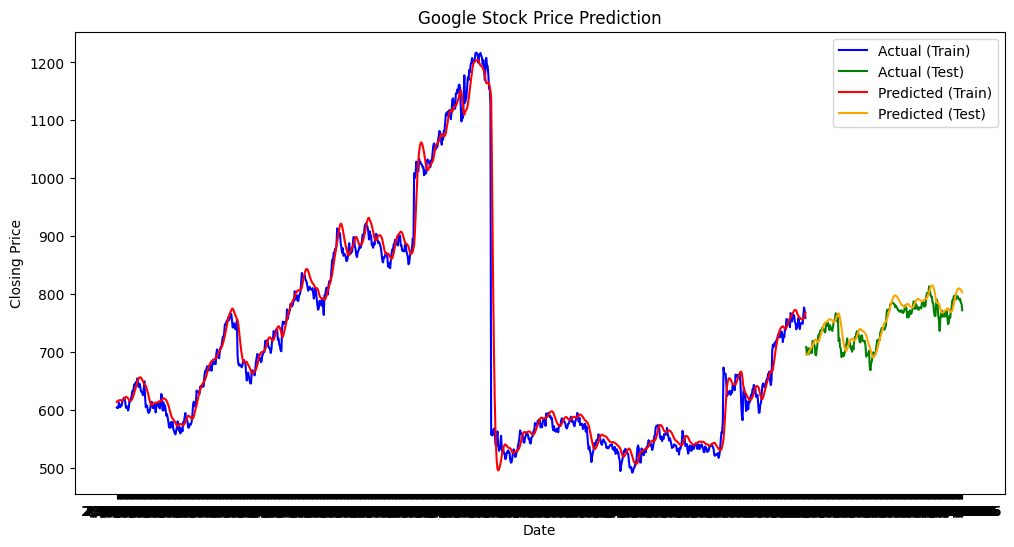

In [25]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][time_steps+1:train_size+1], Y_train.flatten(), color='blue', label='Actual (Train)')
plt.plot(df['Date'][train_size+time_steps:], Y_test.flatten(), color='green', label='Actual (Test)')
plt.plot(df['Date'][time_steps+1:train_size+1], train_predictions.flatten(), color='red', label='Predicted (Train)')
plt.plot(df['Date'][train_size+time_steps:], test_predictions.flatten(), color='orange', label='Predicted (Test)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Stock Price Prediction')
plt.legend()
plt.show()
